 # <span style="font-family: TrebucImport all required moduleshet MS; font-weight:bold;font-size:1.5em;color:#00b3e5;"> Exploratory Data Analysis

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:1.0em;color:darkorange;">  Refer [Mendeley dataset](../../../data/english/clean-datasets/mendeley_dataset) used for this EDA

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:1.0em;color:darkorange;">  Refer [this script](../../task-1-data-pre-processing/scripts/clean_mendeley_hatespeech_dataset.ipynb) for pre processing steps

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:1.2em;color:#00b3e5;"> Imports

In [4]:
!pip install wordcloud
!pip install nltk

In [5]:
import pandas as pd
import numpy as np
import glob
import os
import seaborn as sns
from collections import Counter
from matplotlib import pyplot as plt
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud

In [6]:
import nltk 
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\MSS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:1.2em;color:#00b3e5;"> Common Functions 

In [7]:
# For getting few on screen display in a way it looks good
def bootstrap():
    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', 1000)
    pd.set_option('display.colheader_justify', 'center')
    pd.set_option('display.precision', 3)

In [8]:
def print_df_details(df):
    print("\n****** Start Dataframe Details ******")
    print("Dataframe Shape is ")
    print(df.shape)
    print("Dataframe Info is ")
    print(df.info())
    print("Dataframe random records ")
    display(df.sample(5) if len(df) > 5 else df.sample(1))
    print("****** End Dataframe Details ******\n")

In [9]:
csv_files = os.path.join("../../../data/english/clean-datasets/mendeley_dataset/", "*.csv")
files = glob.glob(csv_files)
input_data = pd.concat(map(pd.read_csv, files), ignore_index=True)

In [10]:
dataset = input_data.drop(['Unnamed: 0'], axis=1)
print_df_details(dataset)


****** Start Dataframe Details ******
Dataframe Shape is 
(560879, 5)
Dataframe Info is 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560879 entries, 0 to 560878
Data columns (total 5 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   corpus_name              560879 non-null  object
 1   raw_sentence             560879 non-null  object
 2   label                    560879 non-null  int64 
 3   clean_sentence_training  560601 non-null  object
 4   clean_sentence_EDA       560601 non-null  object
dtypes: int64(1), object(4)
memory usage: 21.4+ MB
None
Dataframe random records 


,corpus_name,raw_sentence,label,clean_sentence_training,clean_sentence_EDA
98030,mendeley_dataset,(Just off the top of my head) It appears to me...,0,Just top head It appears issue isolationpurifi...,Just top head It appears issue isolationpurifi...
226899,mendeley_dataset,RT @Banthemoms I'm not sexist but I hate femin...,1,RT @Banthemoms Im sexist I hate feminist femal...,RT @Banthemoms Im sexist I hate feminist femal...
476382,mendeley_dataset,Hey people list to this This is incredible!! I...,1,Hey people list This incredible I used work so...,Hey people list This incredible I used work so...
26156,mendeley_dataset,i see youve redirected the clairsentience art...,0,see youve redirected clairsentience article le...,see youve redirected clairsentience article le...
244540,mendeley_dataset,"well, that 's very good for you. here in Europ...",0,well s good you Europe s basically dream,well s good you Europe s basically dream


****** End Dataframe Details ******



## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:1.2em;color:#00b3e5;"> Guidelined EDA

<AxesSubplot:>

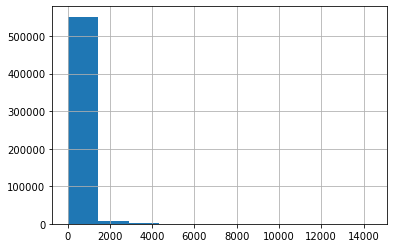

In [11]:
# cheching the number of characters in the sentences
# the colums we are extracting sentences from is assigned here and throughout to the variable 'data'

data = dataset['clean_sentence_EDA']
data.str.len().hist()

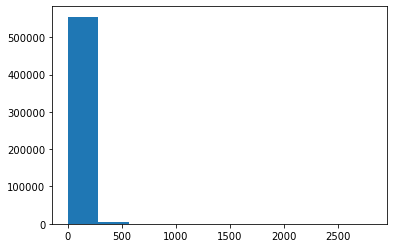

In [12]:
# count words to gain insights

counts = []

for sentence in dataset['clean_sentence_EDA']:
    sentence = word_tokenize(str(sentence))
    word_count = len(sentence)
    counts.append(word_count)

plt.hist(counts)
plt.show()

In [13]:
# basic metrics

total_num_words = sum(counts) # total number of words
average_sentence_length = np.mean(counts) # print everage sentence length

word_lengths = []
for sentence in dataset['clean_sentence_EDA']:
    sentence = word_tokenize(str(sentence))
    for word in sentence:
        length = len(word)
        word_lengths.append(length)

average_word_length = np.mean(word_lengths) # print everage word length

print(f'Total number of words in the dataset: {total_num_words} words.')
print(f'Average length of words in the dataset: {average_word_length} characters.')
print(f'Average length of sentences in the dataset: {average_sentence_length} words.')

Total number of words in the dataset: 17415500 words.
Average length of words in the dataset: 5.659977950676121 characters.
Average length of sentences in the dataset: 31.05036915270495 words.


## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:1.0em;color:red;">  The histograms and metrics above show that most sentences in the corpus are about 1000+ character and 250+ word long. The total number of words in the dataset is 17 Million. The average length of words is 5 characters.

### Most frequent words

In [14]:
all_words = []

for sentence in dataset['clean_sentence_EDA']:
    words = word_tokenize(str(sentence))
    for word in words:
        all_words.append(word)

print(all_words[:100])

['This', 'creative', 'Those', 'dictionary', 'definition', 'term', 'insurance', 'ensurance', 'properly', 'applied', 'destruction', 'If', 'understand', 'that', 'fine', 'legitimate', 'criticism', 'Ill', 'write', 'three', 'man', 'cell', 'bounty', 'hunter', 'easy', 'understand', 'ensured', 'insured', 'different', 'differ', 'assured', 'The', 'sentence', 'quote', 'absolutely', 'neutral', 'You', 'familiar', 'underlying', 'theory', 'strikeback', 'eg', 'submarine', 'employed', 'nuclear', 'warfare', 'guiding', 'insurance', 'likely', 'three', 'man', 'cell', 'structure', 'kept', 'IRA', 'broken', 'British', 'If', 'thats', 'fault', 'fine', 'I', 'fix', 'explain', 'But', 'there', 'nothing', 'personal', 'creative', 'it', 'Im', 'tired', 'arguing', 'you', 'Re', 'article', 'multiparty', 'turn', 'plenty', 'use', 'mutually', 'mutual', 'If', 'I', 'apply', 'standard', 'Id', 'moving', 'Mutual', 'Assured', 'Destruction', 'talk', 'appealing', 'Reagan', 'voter', 'bias', 'effectiveness', 'dropping', 'ly', 'There']


In [15]:
# let us find the 20 most common words now

most_common = Counter(all_words).most_common(50)
print(most_common)

[('I', 488986), ('article', 164065), ('#', 131921), ('page', 125588), ('@', 111877), ('The', 107484), ('user', 91607), ('like', 83994), ('would', 74330), ('one', 74261), ('Wikipedia', 66774), ('If', 64265), ('You', 62075), ('people', 56890), ('think', 56517), ('know', 54436), ('talk', 50986), ('it', 50463), ('see', 49471), ('Im', 49095), ('source', 47980), ('time', 47850), ('make', 43313), ('This', 42844), ('get', 42759), ('It', 42448), ('Please', 39173), ('say', 38994), ('you', 38971), ('use', 38966), ('also', 38242), ('edit', 38222), ('need', 37318), ('want', 35957), ('may', 33805), ('even', 32145), ('way', 31665), ('good', 31346), ('name', 30909), ('please', 30458), ('link', 30020), ('A', 29741), ('thing', 29424), ('go', 28549), ('u', 28508), ('could', 27859), ('comment', 27299), ('information', 27222), ('look', 26823), ('work', 26536)]


Text(0.5, 1.0, 'Top 50 Words vs Frequency')

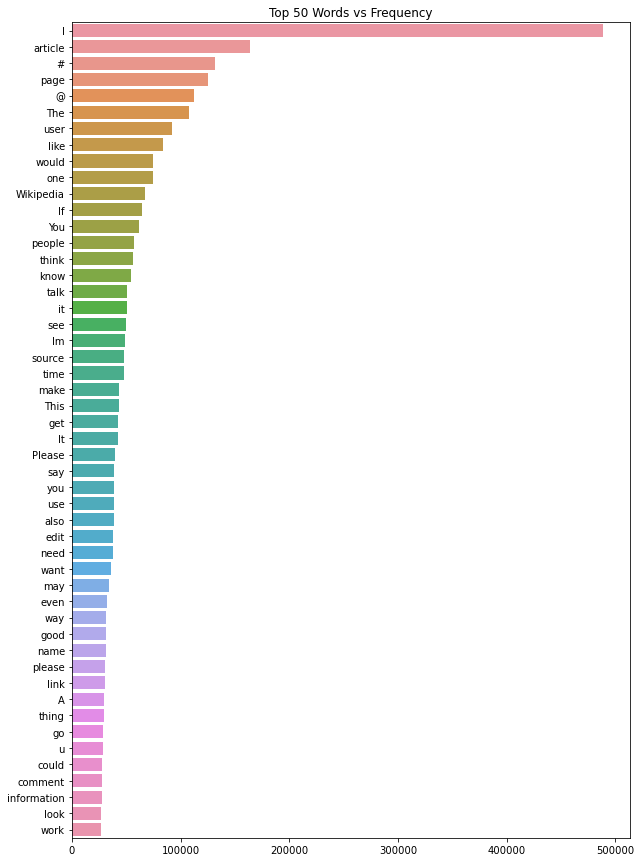

In [16]:
words, frequency = [], []
for word, count in most_common:
    words.append(word)
    frequency.append(count)

f, ax = plt.subplots(figsize=(10, 15))
sns.barplot(x = frequency, y = words).set_title('Top 50 Words vs Frequency')


In [17]:
all_words_clean = []

for row in dataset['clean_sentence_EDA']:
    words = word_tokenize(str(row))
    for word in words:
        word = word.lower() # lowercase all word
        if len(word) >= 3: # quick solution to get rif of contractions
            # find better solution in official version
            all_words_clean.append(word)

print(all_words_clean[:100])

['this', 'creative', 'those', 'dictionary', 'definition', 'term', 'insurance', 'ensurance', 'properly', 'applied', 'destruction', 'understand', 'that', 'fine', 'legitimate', 'criticism', 'ill', 'write', 'three', 'man', 'cell', 'bounty', 'hunter', 'easy', 'understand', 'ensured', 'insured', 'different', 'differ', 'assured', 'the', 'sentence', 'quote', 'absolutely', 'neutral', 'you', 'familiar', 'underlying', 'theory', 'strikeback', 'submarine', 'employed', 'nuclear', 'warfare', 'guiding', 'insurance', 'likely', 'three', 'man', 'cell', 'structure', 'kept', 'ira', 'broken', 'british', 'thats', 'fault', 'fine', 'fix', 'explain', 'but', 'there', 'nothing', 'personal', 'creative', 'tired', 'arguing', 'you', 'article', 'multiparty', 'turn', 'plenty', 'use', 'mutually', 'mutual', 'apply', 'standard', 'moving', 'mutual', 'assured', 'destruction', 'talk', 'appealing', 'reagan', 'voter', 'bias', 'effectiveness', 'dropping', 'there', 'double', 'standard', 'edits', 'come', 'history', 'book', 'like'

In [18]:
most_common2 = Counter(all_words_clean).most_common(50)
print(most_common2)

[('article', 167514), ('page', 129431), ('you', 127329), ('the', 126411), ('user', 95533), ('like', 87116), ('wikipedia', 81836), ('one', 80476), ('would', 77051), ('please', 70559), ('this', 66925), ('people', 60051), ('talk', 59586), ('think', 57585), ('see', 56736), ('know', 55492), ('also', 50072), ('time', 49487), ('source', 48900), ('get', 46198), ('make', 44495), ('edit', 40165), ('use', 40091), ('and', 39734), ('say', 39634), ('need', 38092), ('may', 37579), ('want', 36789), ('good', 36514), ('even', 36077), ('that', 35985), ('there', 34445), ('thanks', 33665), ('not', 32998), ('name', 32609), ('way', 32430), ('well', 31437), ('link', 30832), ('could', 30814), ('fuck', 30463), ('thing', 29734), ('look', 29105), ('new', 28550), ('here', 28495), ('information', 28247), ('comment', 28150), ('first', 28070), ('image', 27782), ('really', 27664), ('help', 27489)]


<AxesSubplot:>

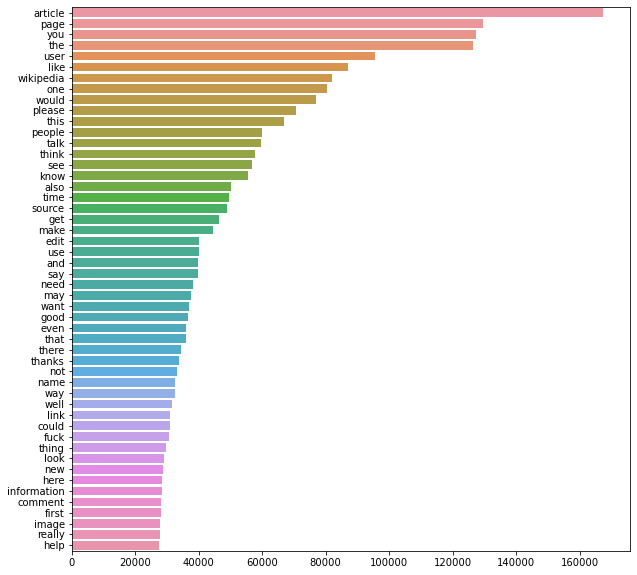

In [19]:
words, frequency = [], []
for word, count in most_common2:
    words.append(word)
    frequency.append(count)
    
fig, ax = plt.subplots(figsize=(10, 10))
sns.barplot(x = frequency, y = words, ax=ax)

### Label balance

<AxesSubplot:xlabel='label', ylabel='count'>

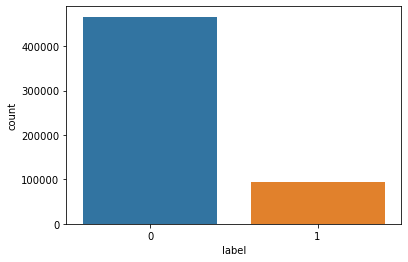

In [20]:
sns.countplot(x=dataset["label"])

In [21]:
risky = 0
non_risky = 0

for label in str(dataset['label']):
    if label == '1':
        risky += 1
    elif label == '0':
        non_risky += 1

print(risky)
print(non_risky)

4
14


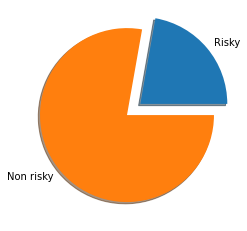

In [22]:
# plot a pie chart to show label proportions

y = np.array([risky,non_risky])
custom_labels = ["Risky", "Non risky"]
myexplode = [0.2, 0] # not compulsory (use for interesting value, i.e, most or least represented)

plt.pie(y, labels = custom_labels, explode = myexplode, shadow = True)
plt.show() 

## Cloud

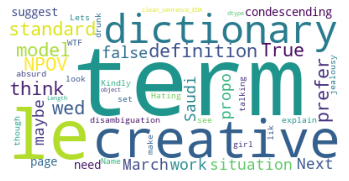

In [23]:
# create a word cloud
# make sure the dataset is nice and clean before generating this

word_cloud = WordCloud(collocations = False, background_color = 'white').generate(str(dataset['clean_sentence_EDA']))

plt.imshow(word_cloud, interpolation=None)
plt.axis("off")
plt.show()

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:1.2em;color:#00b3e5;"> Other EDA

In [24]:
#Create a balanced dataset
dataset.dropna(inplace=True)
dataset['label'].value_counts()

0    466011
1     94590
Name: label, dtype: int64

In [25]:
threshold = 94590
df_0 = dataset.query('(label == 0)').sample(n=(threshold)) # completely random - we should find a better way
df_1 = dataset.query('(label == 1)')
df = pd.concat([df_0.sample(frac=1), df_1.sample(frac=1)], ignore_index=True)
df = df.sample(frac=1)
df.shape

(189180, 5)

<AxesSubplot:xlabel='label', ylabel='count'>

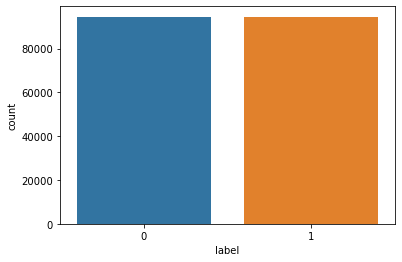

In [26]:
sns.countplot(x=df["label"])

In [27]:
print_df_details(df)


****** Start Dataframe Details ******
Dataframe Shape is 
(189180, 5)
Dataframe Info is 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 189180 entries, 148109 to 160574
Data columns (total 5 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   corpus_name              189180 non-null  object
 1   raw_sentence             189180 non-null  object
 2   label                    189180 non-null  int64 
 3   clean_sentence_training  189180 non-null  object
 4   clean_sentence_EDA       189180 non-null  object
dtypes: int64(1), object(4)
memory usage: 8.7+ MB
None
Dataframe random records 


,corpus_name,raw_sentence,label,clean_sentence_training,clean_sentence_EDA
164621,mendeley_dataset,Imaju bolji smjestaj nego nasi beskucnici!i on...,1,Imaju bolji smjestaj nego nasi beskucnicii oni...,Imaju bolji smjestaj nego nasi beskucnicii oni...
114167,mendeley_dataset,please do not delete my responces. They conta...,1,please delete responces They contain proof see...,please delete responces They contain proof see...
7761,mendeley_dataset,"::Okay, thanks for writing an awesome article...",0,Okay thanks writing awesome article Im really ...,Okay thanks writing awesome article Im really ...
136097,mendeley_dataset,"the category was unnecesary, as explained in m...",1,category unnecesary explained edit summary You...,category unnecesary explained edit summary You...
184244,mendeley_dataset,".@user welcome to 2016, looks like 2017 is go...",1,user welcome look like going full batshit du...,user welcome look like going full batshit du...


****** End Dataframe Details ******



In [28]:
df['corpus_name'] = df['corpus_name'].astype('string')
df['raw_sentence'] = df['raw_sentence'].astype('string')
df['clean_sentence_training'] = df['clean_sentence_training'].astype('string')
df['clean_sentence_EDA'] = df['clean_sentence_EDA'].astype('string')
df['label'] = df['label'].astype('int8')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 189180 entries, 148109 to 160574
Data columns (total 5 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   corpus_name              189180 non-null  string
 1   raw_sentence             189180 non-null  string
 2   label                    189180 non-null  int8  
 3   clean_sentence_training  189180 non-null  string
 4   clean_sentence_EDA       189180 non-null  string
dtypes: int8(1), string(4)
memory usage: 7.4 MB


## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.8em;color:darkorange;"> Word cloud only with Risky sentences.

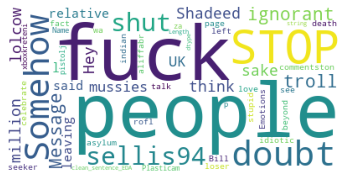

In [29]:
word_cloud = WordCloud(collocations = False, background_color = 'white').generate( \
            str(df.loc[df['label'] == 1, 'clean_sentence_EDA']))

plt.imshow(word_cloud, interpolation=None)
plt.axis("off")
plt.show()

In [30]:
!pip install textblob

In [31]:
from textblob import TextBlob

In [32]:
df.isna().sum()

corpus_name                0
raw_sentence               0
label                      0
clean_sentence_training    0
clean_sentence_EDA         0
dtype: int64

In [33]:
df['sentiment'] = df['clean_sentence_EDA'].apply(lambda x: TextBlob(x).sentiment.polarity)

array([[<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>]], dtype=object)

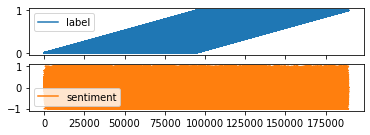

In [34]:
df.plot(figsize = (len(df.columns), len(df.columns)), subplots=True, layout=(len(df.columns),1),)

In [35]:
df.loc[df['label'] == 1, 'sentiment'].mean()

-0.06091100069401323

In [36]:
df.loc[df['label'] == 0, 'sentiment'].mean()

0.07263040006949552

(array([ 1473.,  5103., 12478., 14941., 24737., 95461., 20046., 10114.,
         2210.,  2617.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <BarContainer object of 10 artists>)

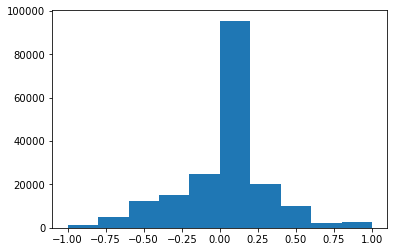

In [37]:
plt.hist(df['sentiment'])

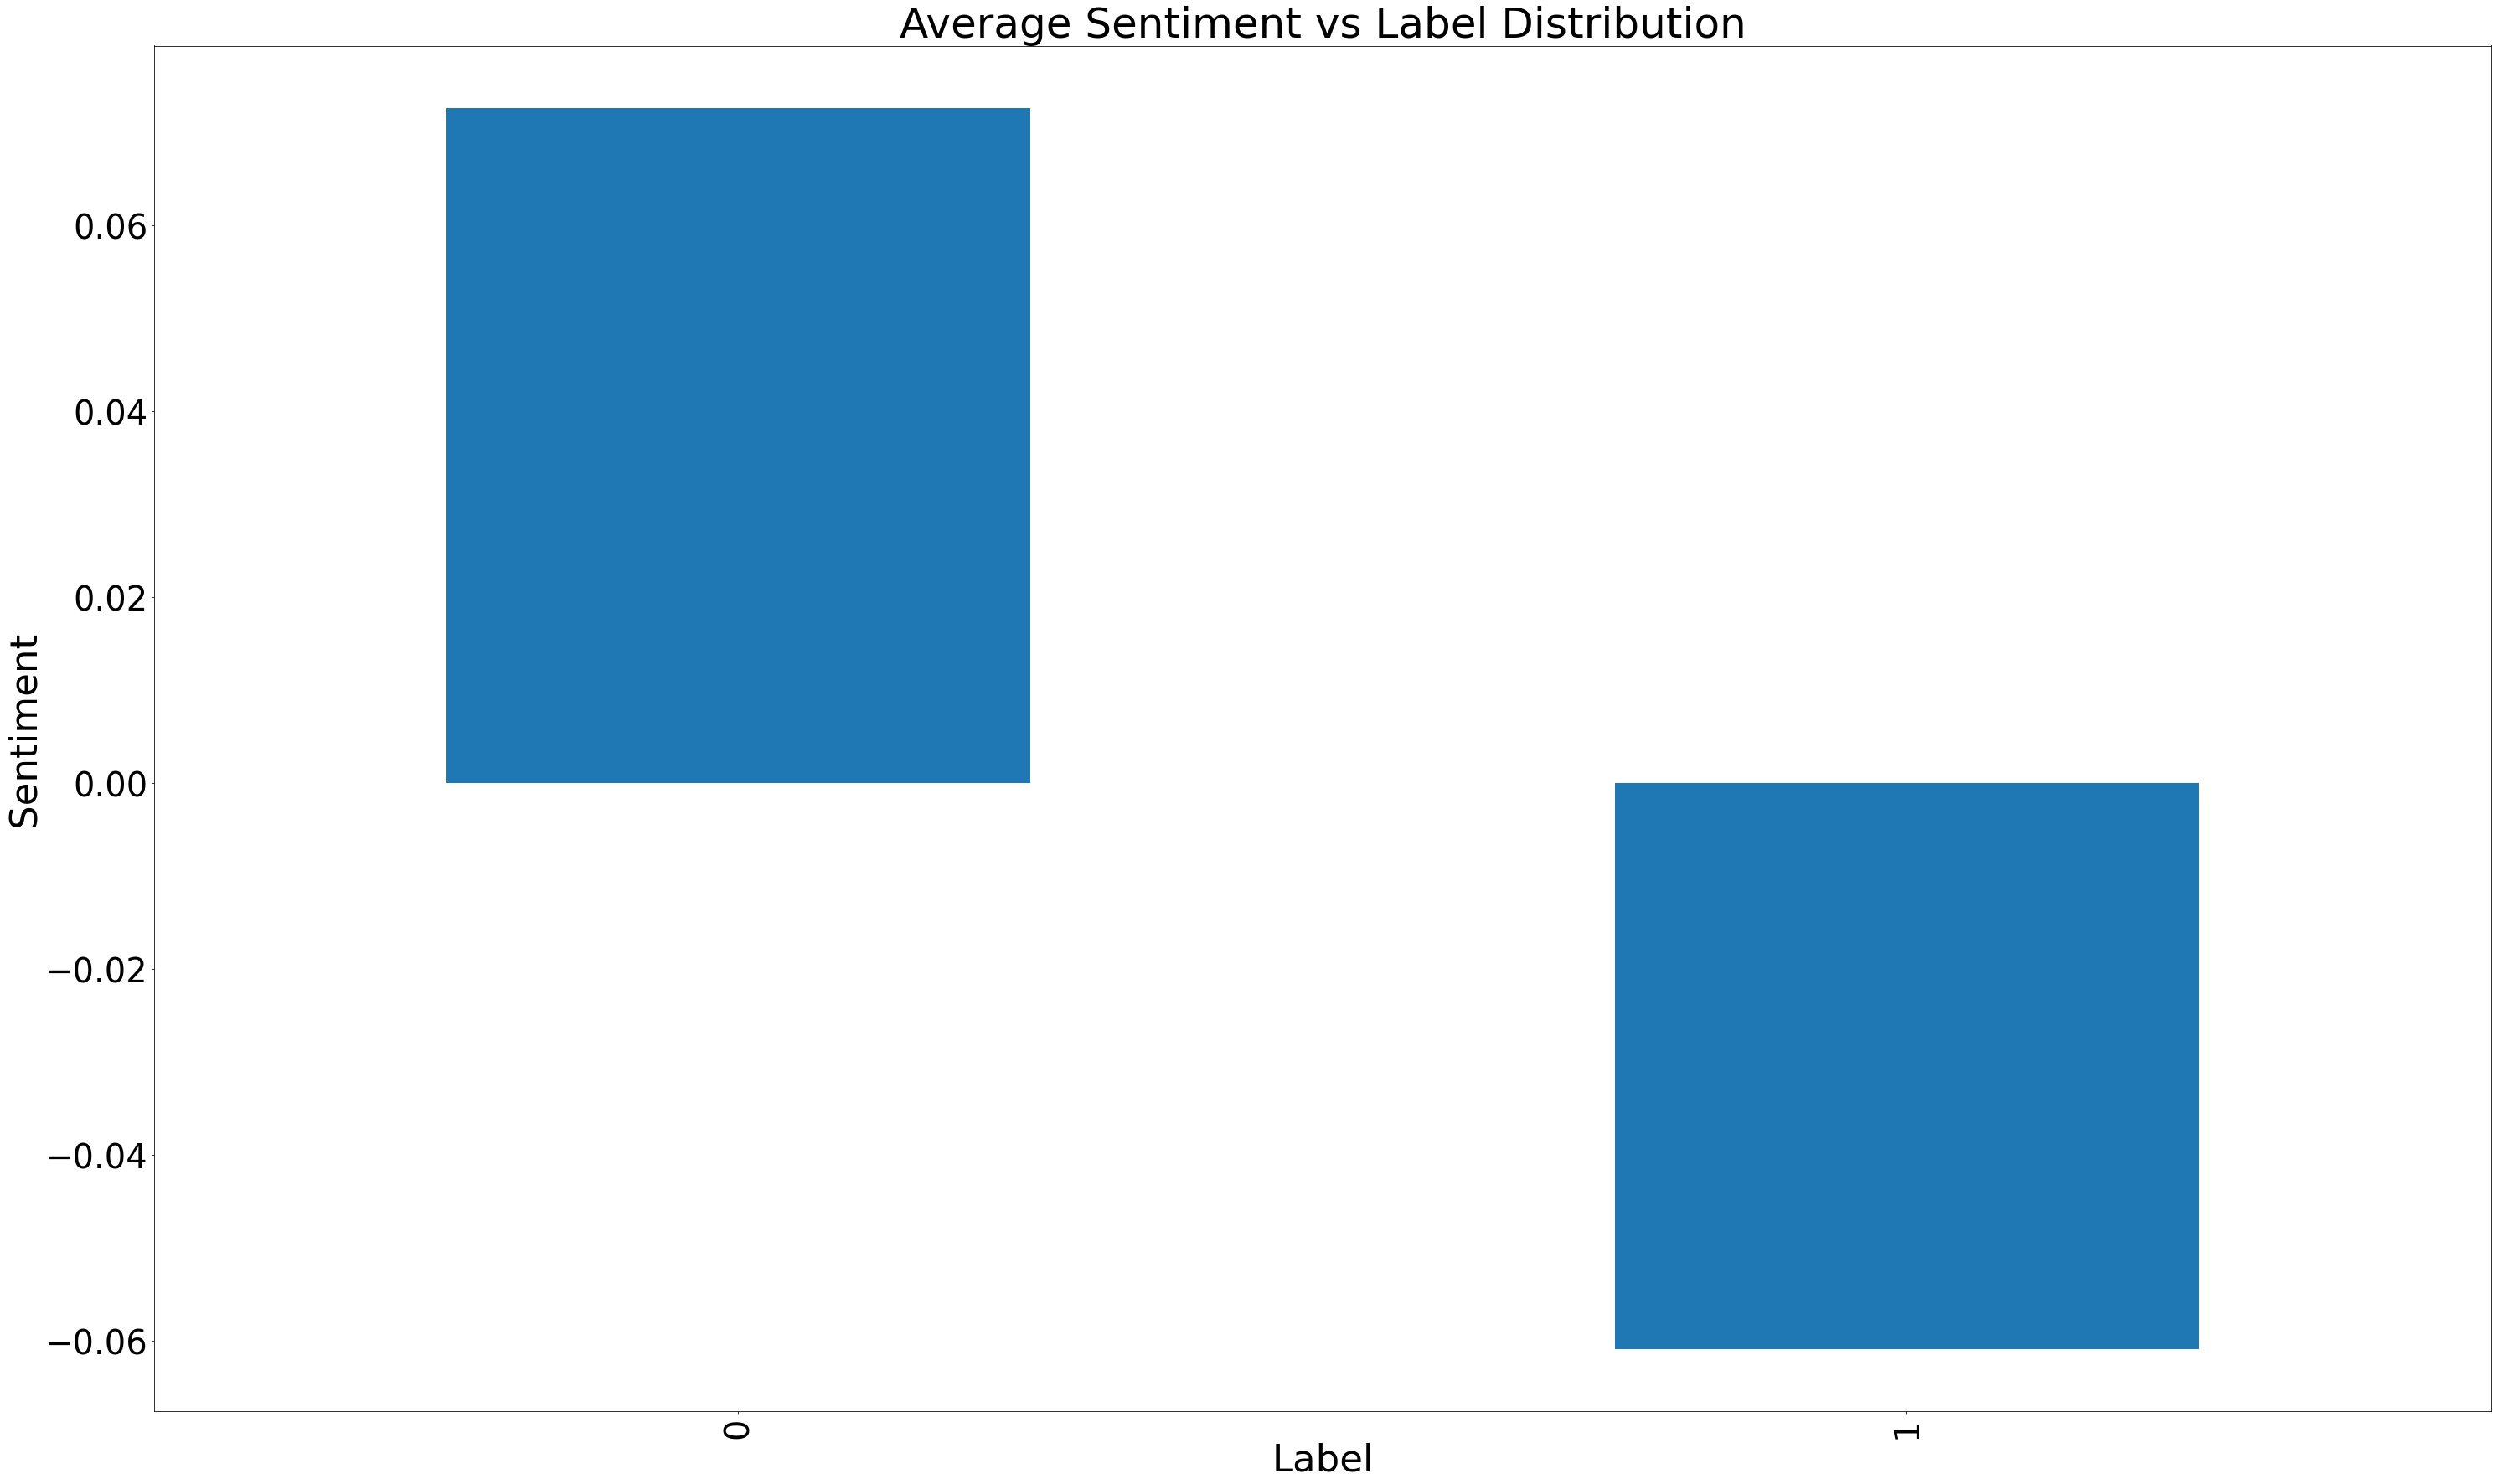

In [38]:
polarity_avg = df.groupby('label')['sentiment'].mean().plot(kind='bar', figsize=(50,30))
plt.xlabel('Label', fontsize=45)
plt.ylabel('Sentiment', fontsize=45)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.title('Average Sentiment vs Label Distribution', fontsize=50)
plt.show()

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:1.0em;color:red;">  Average sentiment score is negative for hatespeech and positive for non hatespeech. This gives more confident with the dataset

In [39]:
df['word_count'] = df['clean_sentence_EDA'].apply(lambda x: len(str(x).split()))
df['length'] = df['clean_sentence_EDA'].apply(len)

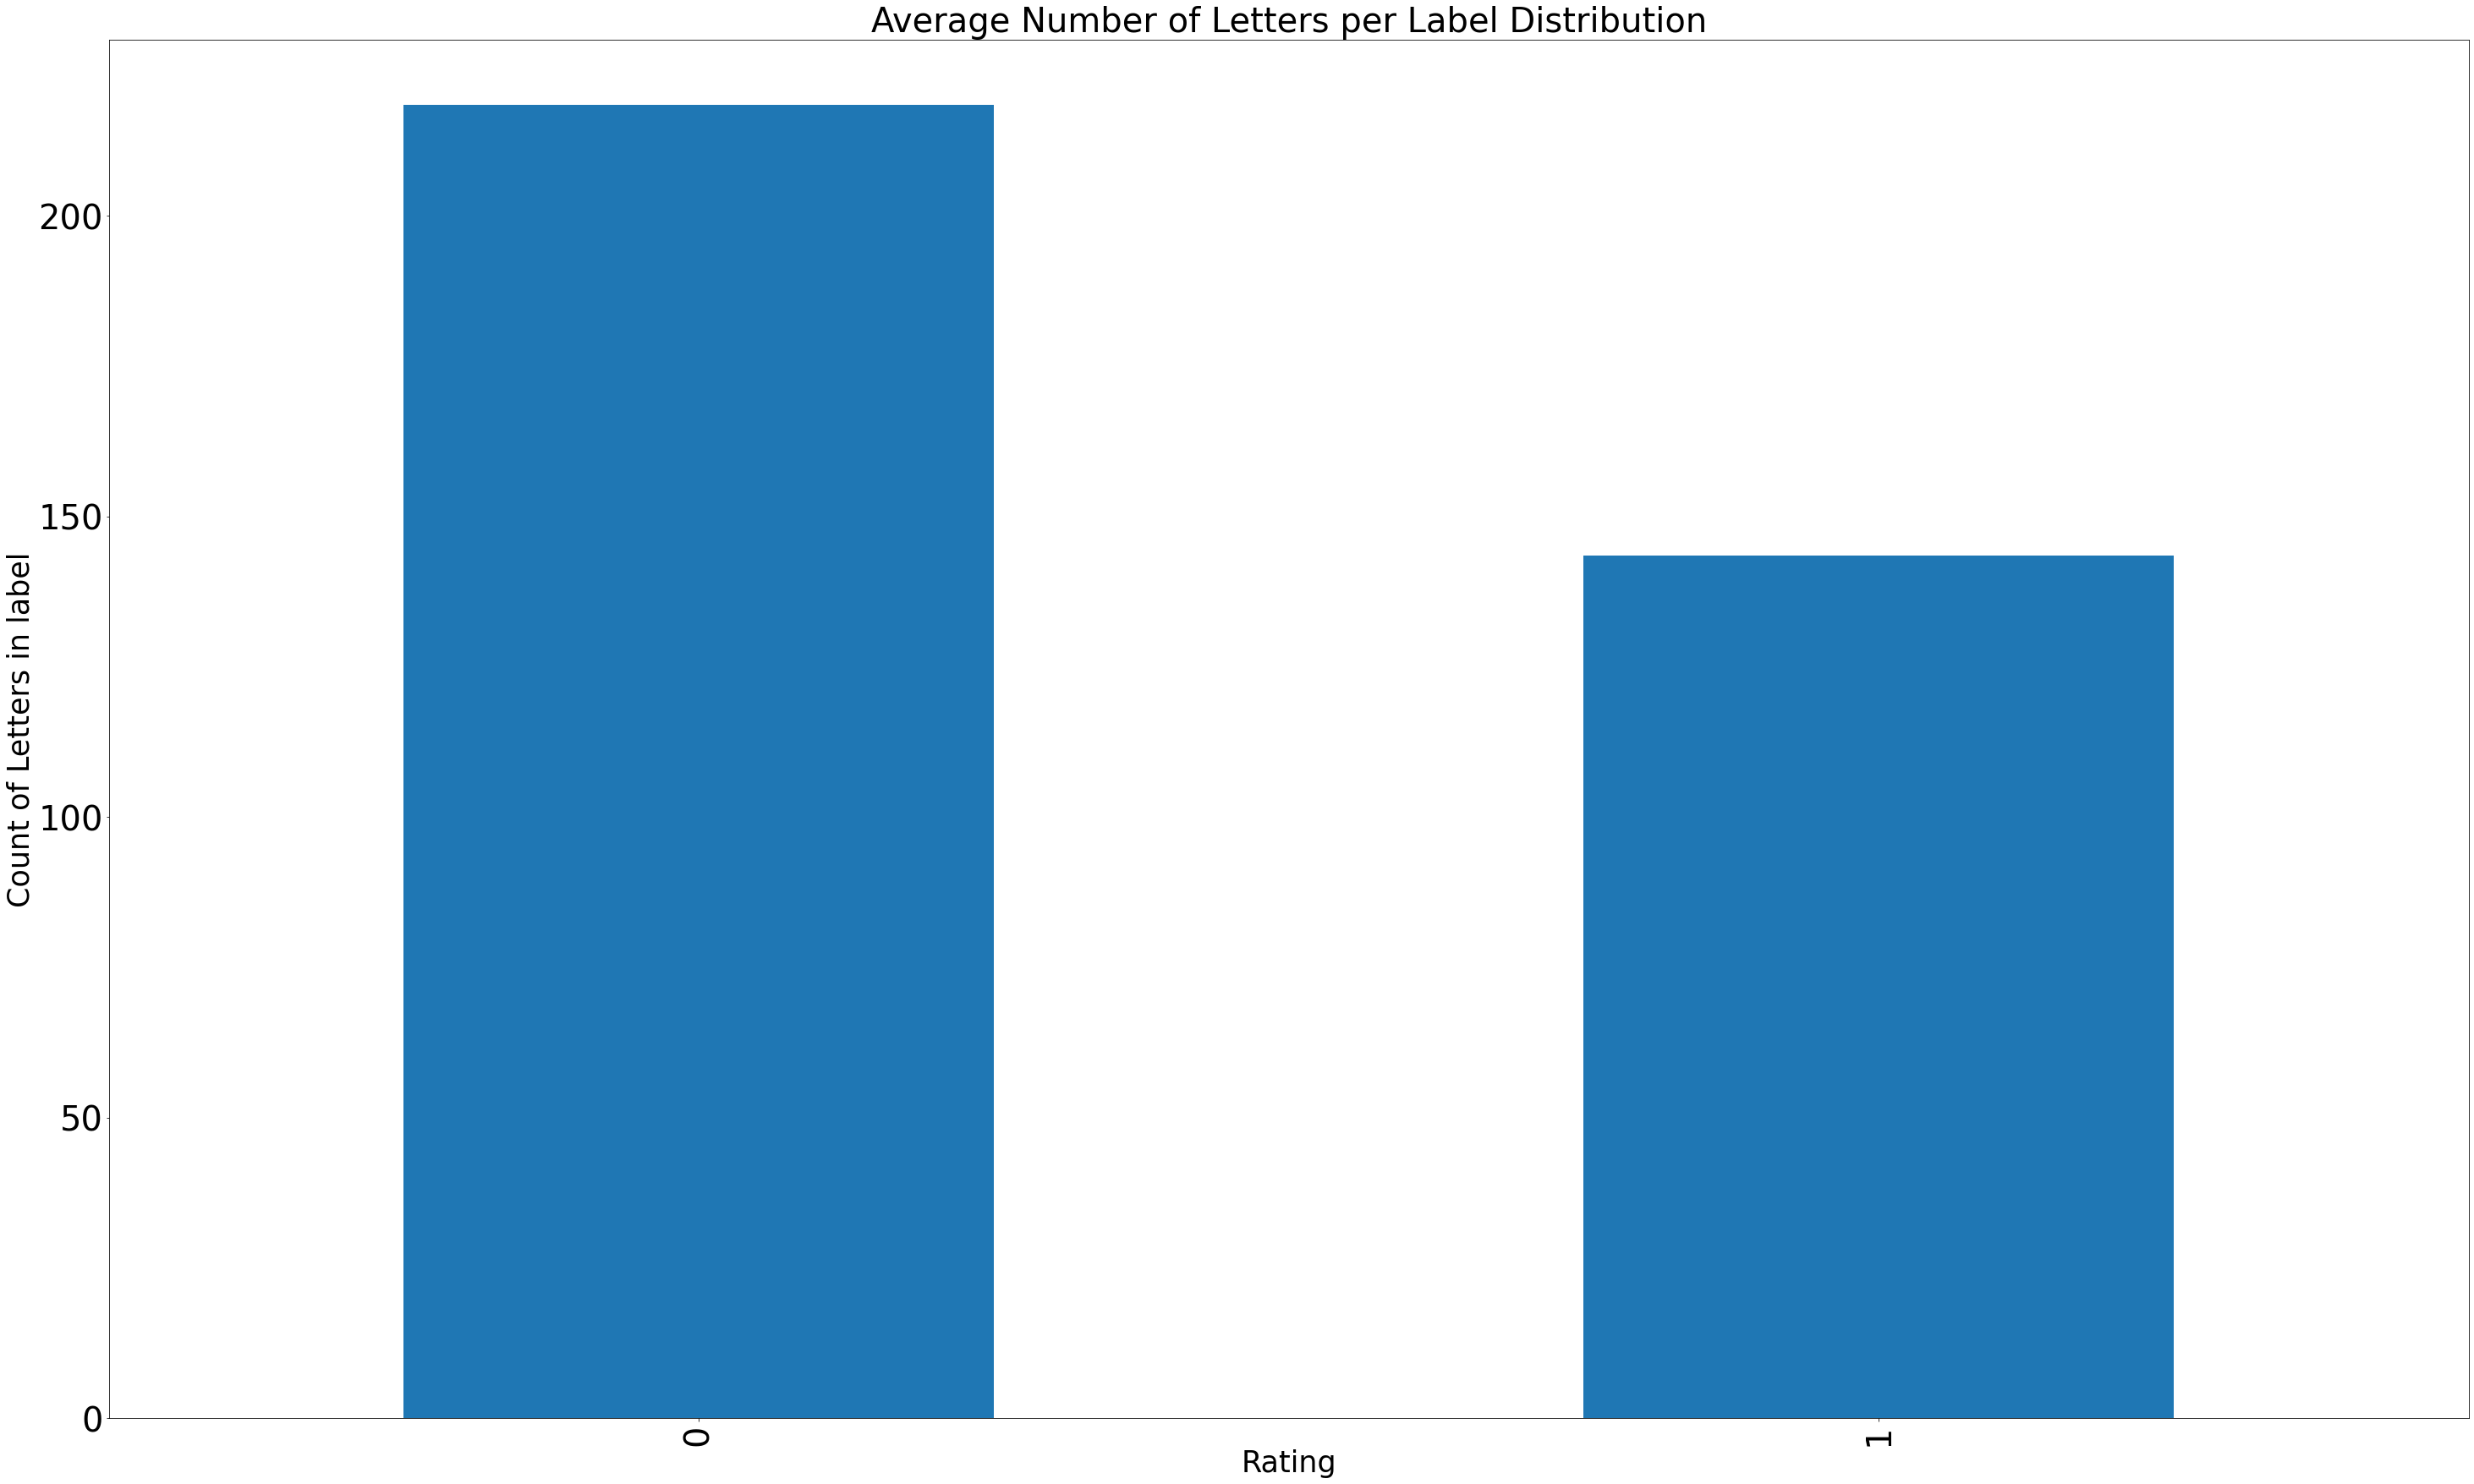

In [40]:
letter_avg = df.groupby('label')['length'].mean().plot(kind='bar', figsize=(50,30))
plt.xlabel('Rating', fontsize=35)
plt.ylabel('Count of Letters in label', fontsize=35)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.title('Average Number of Letters per Label Distribution', fontsize=40)
plt.show()

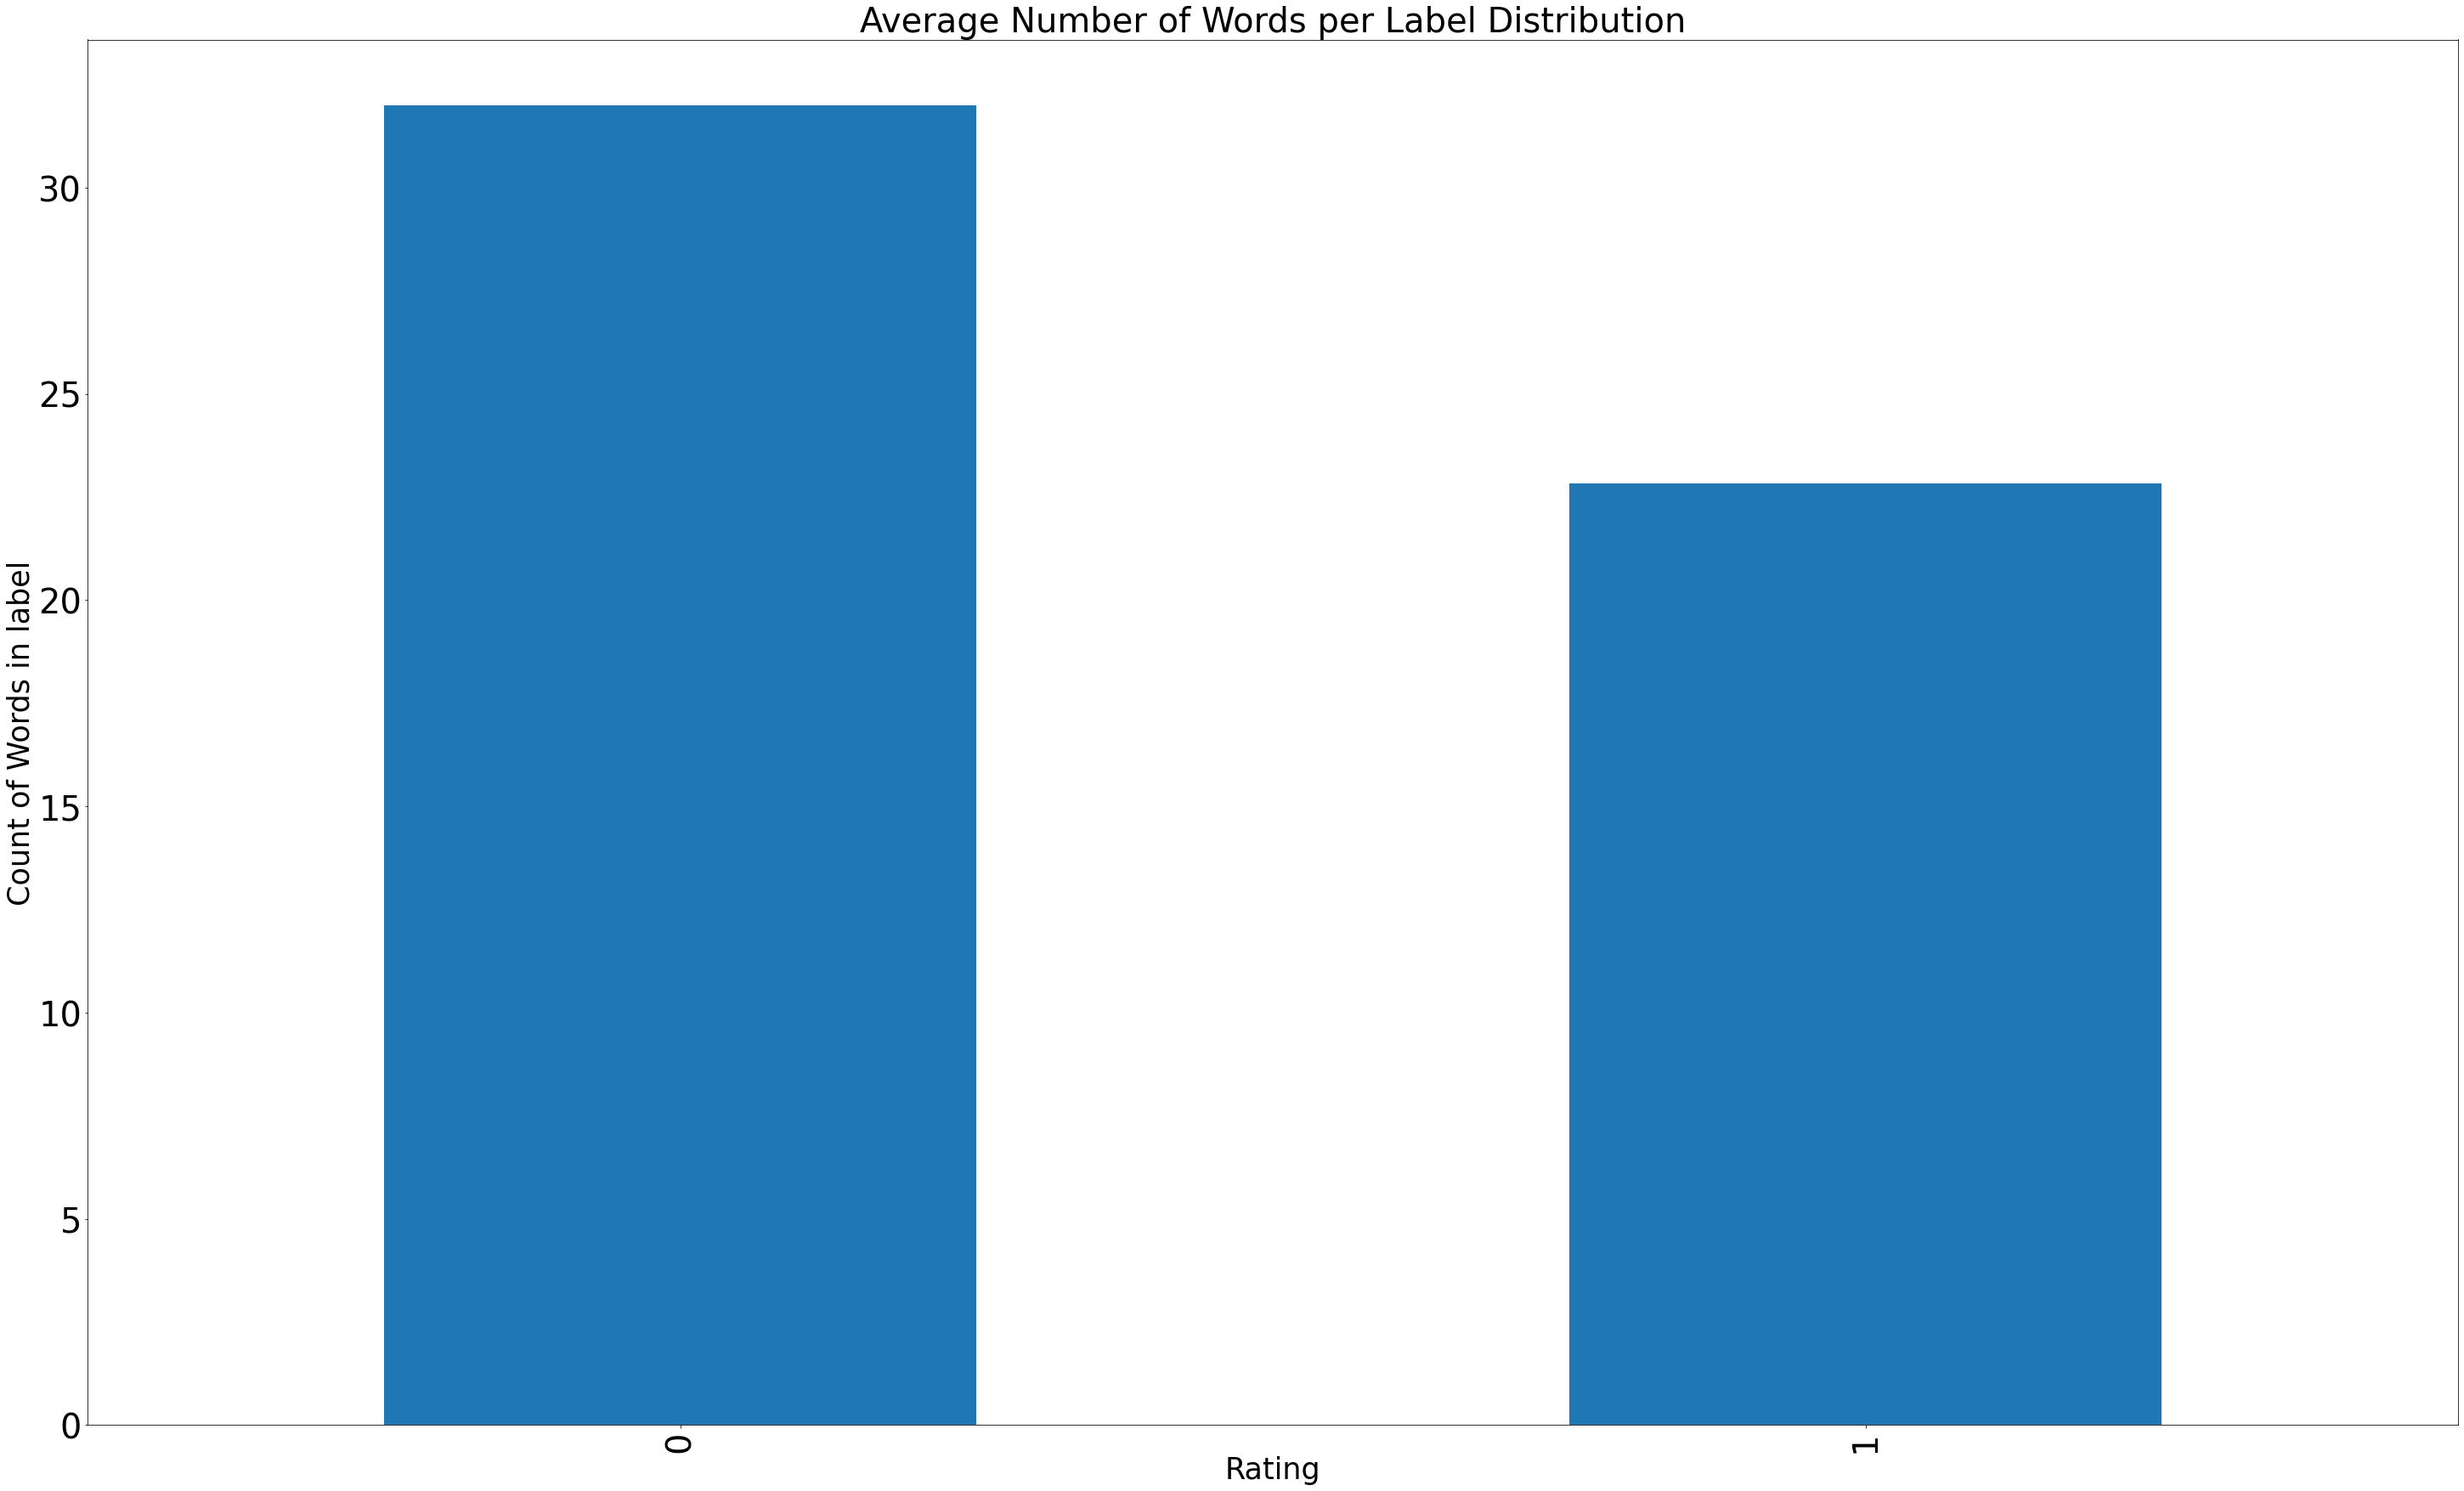

In [41]:
word_avg = df.groupby('label')['word_count'].mean().plot(kind='bar', figsize=(50,30))
plt.xlabel('Rating', fontsize=35)
plt.ylabel('Count of Words in label', fontsize=35)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.title('Average Number of Words per Label Distribution', fontsize=40)
plt.show()

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:1.0em;color:red;"> The length of the hatespeech is less in average. Sounds like people use big sentences (and more words) when they feel good

<AxesSubplot:>

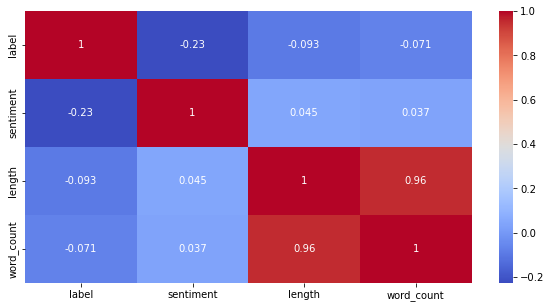

In [42]:
correlation = df[['label','sentiment', 'length', 'word_count']].corr()
plt.figure(figsize=(10,5))
sns.heatmap(correlation, cmap='coolwarm', annot=True)

In [43]:
risky_words = df.loc[df['label'] == 1, 'clean_sentence_EDA']
all_risky_words = []
for sentence in risky_words:
    sentence = word_tokenize(str(sentence))
    for word in sentence:
        all_risky_words.append(word)

non_risky_words = df.loc[df['label'] == 0, 'clean_sentence_EDA']
all_non_risky_words = []
for sentence in non_risky_words:
    sentence = word_tokenize(str(sentence))
    for word in sentence:
        all_non_risky_words.append(word)

In [44]:
from nltk.probability import FreqDist

In [45]:
mostcommon = FreqDist(all_non_risky_words).most_common(100)
word_cloud_1 = WordCloud(collocations = False, background_color = 'white').generate(str(mostcommon))


In [46]:
mostcommon = FreqDist(all_risky_words).most_common(100)
word_cloud_2 = WordCloud(collocations = False, background_color = 'white').generate(str(mostcommon))

(-0.5, 399.5, 199.5, -0.5)

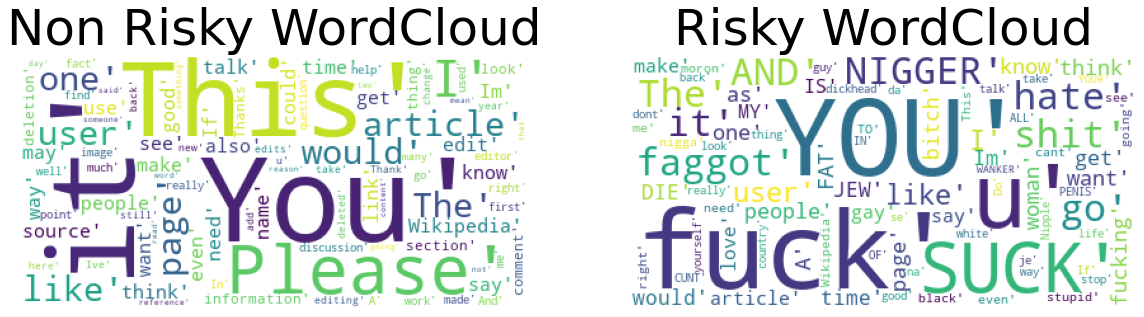

In [47]:
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(1,2,1)
ax1.set_title("Non Risky WordCloud", {'fontsize':50}, loc='center', pad=11.0)
ax1.imshow(word_cloud_1)
ax1.axis('off')
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(word_cloud_2)
ax2.set_title("Risky WordCloud", {'fontsize':50}, loc='center', pad=11.0)
ax2.axis('off')

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:1.0em;color:red;">  Choice of words used in risky and non risky sentences are giving the story. 

In [48]:
FreqDist(all_non_risky_words).most_common(25)[0][0]

'I'

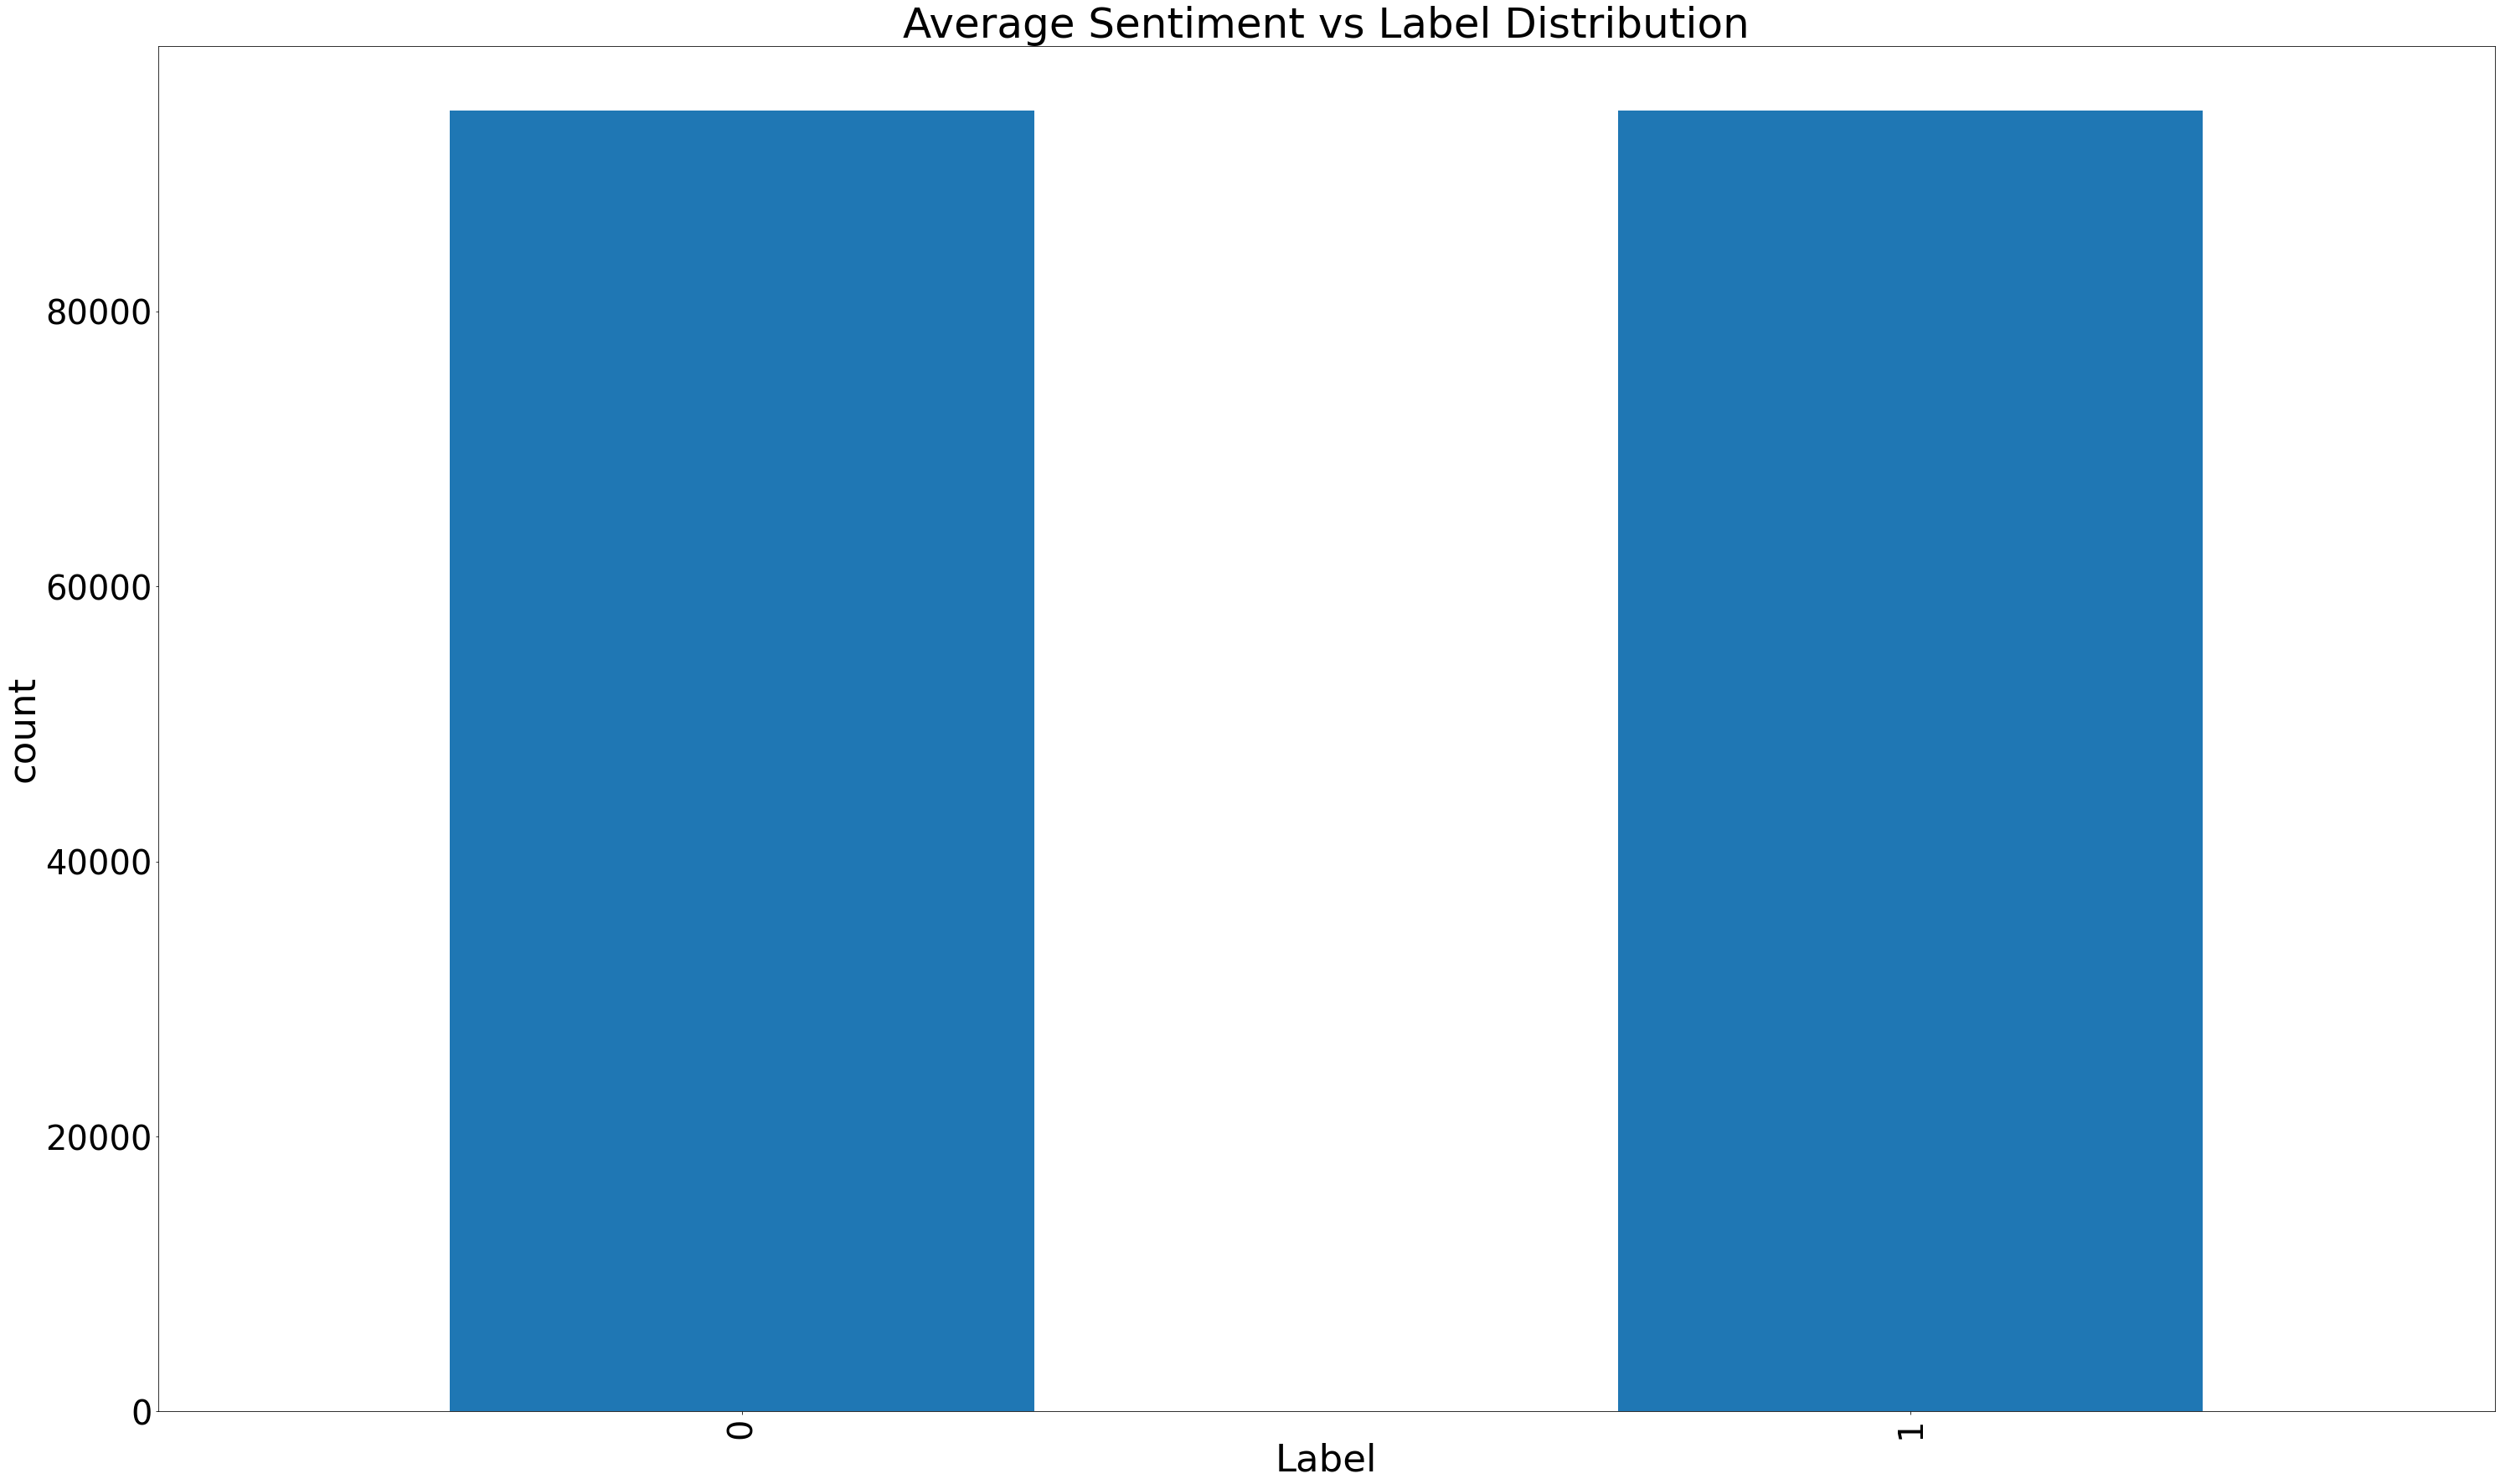

In [49]:
count = df.groupby('label')['clean_sentence_EDA'].count().plot(kind='bar', figsize=(50,30))
plt.xlabel('Label', fontsize=45)
plt.ylabel('count', fontsize=45)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.title('Average Sentiment vs Label Distribution', fontsize=50)
plt.show()

# TODO - Following is not finished yet...

In [61]:
#print all non-english words
#DO we have library for getting named entity relationship
#Bigram Tri-gram words in sentence
#Bag of words
#df['language'] = df['clean_sentence_EDA'].apply(lambda x: TextBlob(x).detect_language())

## <span style="font-family: Trebuchet MS; font-weight:bold;font-size:0.8em;color:darkorange;">  Reference...

https://github.com/OmdenaAI/aswan-egypt-detecting-hate-nlp/blob/main/src/tasks/task-2-exploratory-data-analysis/guidelines-for-EDA/task2-EDA-guidelines.ipynb
https://towardsdatascience.com/nlp-part-3-exploratory-data-analysis-of-text-data-1caa8ab3f79d#:~:text=Exploratory%20Data%20Analysis%20(EDA)%20is,of%20descriptive%20statistics%20and%20visualizations.